In [ ]:
pip install textblob

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [20]:
consumer_key= '2MxNE0lb1cbfNOhFQ61QJJb51'
consumer_secret= 'cJh8JKvpZY2BDRvDB5oiu7taibvsVb3o28B95K2iV8Yd0ai0ih'
access_token= '457773099-LU9fDEvGxQv7ZKDxypJ58AnzQvIP8K4VPy8w6K32'
access_token_secret= 'CpBuugq33E0kZ0yf7x2K6s3JQmId8J7PvFgc4RCSPDpe0'

In [21]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_term = "@WashWizards -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-01-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

In [14]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [15]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['JTreatz Raptors pskills43 Celtics made him their personal bitch in the playoffs when it mattered Are u stupid or dumb',
 'Raptors pskills43 Nobody hates anybody All we ask from each player is to play with some pride and put up a fight',
 'JTreatz Raptors pskills43 Blah blah blah let me see him do it vs the celtics or bucks',
 'RedDragon23 Jm151 KingMoS FrisbeeRizvi Raptors Klow7 You argued those 2 things after I pointed out the discrepancy',
 'PHDMAC Jm151 KingMoS FrisbeeRizvi Raptors Klow7 the Porzingis thing is 100 true from within the organizationSource Trust me Bro']

In [16]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(-0.3916666666666666,
 TextBlob("JTreatz Raptors pskills43 Celtics made him their personal bitch in the playoffs when it mattered Are u stupid or dumb"))

In [17]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[-0.3916666666666666,
 'JTreatz Raptors pskills43 Celtics made him their personal bitch in the playoffs when it mattered Are u stupid or dumb']

In [18]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.to_csv('Washington.csv', index=False)
sentiment_df.head()

,polarity,tweet
0,-0.391667,JTreatz Raptors pskills43 Celtics made him the...
1,0.000000,Raptors pskills43 Nobody hates anybody All we ...
2,0.000000,JTreatz Raptors pskills43 Blah blah blah let m...
3,0.000000,RedDragon23 Jm151 KingMoS FrisbeeRizvi Raptors...
4,0.350000,PHDMAC Jm151 KingMoS FrisbeeRizvi Raptors Klow...


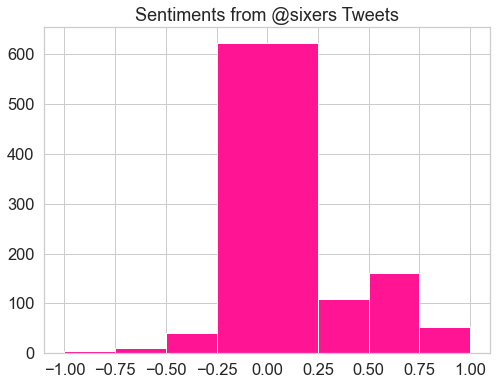

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="deeppink")

plt.title("Sentiments from @sixers Tweets")
plt.show()

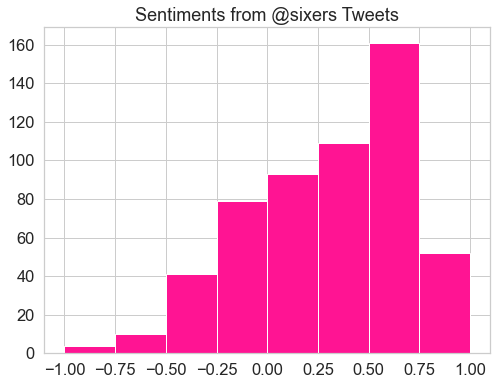

In [68]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="deeppink")

plt.title("Sentiments from @sixers Tweets")
plt.savefig('Philadelphia_team.png')
plt.show()